In [121]:
import pyarrow.feather as feather
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import requests
import os
import concurrent.futures
import multiprocessing
import tensorflow as tf

In [122]:
df = feather.read_feather('data/artsy_full.feather')

In [123]:
df.dropna(subset=['image_versions'], inplace=True)

In [124]:
def convert_to_list(value):
    value = value.tolist()
    
    return value

def get_largest_version(row):
    
    image_versions = row['image_versions']
    
    if 'large' in image_versions:
        version = 'large'
    elif 'medium' in image_versions:
        version = 'medium'
    else:
        version = image_versions[0]
    
    row['main_image_version'] = version
    
    return row
    
df['image_versions'] = df['image_versions'].apply(convert_to_list)
df = df.apply(get_largest_version, axis=1)

In [125]:
df['genes'] = df['genes'].apply(convert_to_list)

In [126]:
all_genes = set()
for idx, row in df.iterrows():
    for gene in row.genes:
        all_genes.add(gene)

In [127]:
len(all_genes)

654

In [128]:
all_genes_dict = dict.fromkeys(all_genes, 0)
for idx, row in df.iterrows():
    for gene in row.genes:
        all_genes_dict[gene] += 1
        


all_genes_dict = {k: v for k, v in sorted(all_genes_dict.items(), key=lambda item: item[1])}

In [136]:
all_genes_dict

{'21st Century': 1,
 'Album, Folio and Fan Formats': 1,
 'The Mundane': 1,
 'Post-World War I European Classicism': 1,
 'Bed': 1,
 'Allover Composition': 1,
 'Engaged with Traditional Japanese Art': 1,
 'Primary Abstraction': 1,
 'Minoan Art': 1,
 'Steel/Iron Frame Construction': 1,
 'Frame': 1,
 'Suburbia': 1,
 'Color Photography': 1,
 'Contemporary Pop': 1,
 'Rings': 1,
 'Portugal': 1,
 'Israel': 1,
 'Balance': 1,
 'Yoruba Art': 1,
 'Sui Dynasty': 1,
 'Upholstered Furniture': 1,
 'Picassoesque': 1,
 'Bentwood': 1,
 'Sofa': 1,
 'Asymmetrical': 1,
 'Postmodern Architecture and Design': 1,
 'Lighting': 1,
 'Constructivism': 1,
 'Snapshot Aesthetic': 1,
 'Maquette': 1,
 'Chance': 1,
 'Northern and Southern Dynasties': 1,
 'Failure': 1,
 'Social Realism': 1,
 'Side Chair': 1,
 'Long Exposure': 1,
 'Concrete Art': 1,
 'Music': 1,
 'Yale University School of Art': 1,
 'Photomontage': 1,
 'Assemblage': 1,
 'Deep Time': 1,
 'Densely Textured or Haptic Surface': 1,
 'Photographs of Surfaces': 

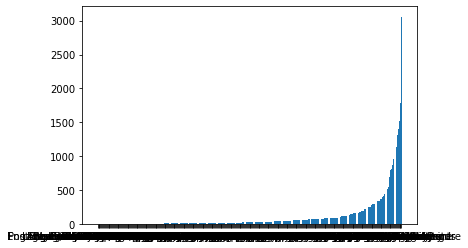

In [109]:
import matplotlib.pyplot as plt

plt.bar(all_genes_dict.keys(), all_genes_dict.values())
plt.show()

In [129]:
genes_simple = {key:all_genes_dict[key] for key in all_genes_dict.keys() if all_genes_dict[key] > 20 and 'Century' not in key}

In [137]:
genes_simple

{'Shallow Depth of Field': 21,
 'Enamel': 21,
 'Figure from the Back (Rückenfigur)': 21,
 'Pointillism': 21,
 'Popular Culture': 21,
 'Vienna Secession': 22,
 'Primary Colors': 22,
 'Silver': 22,
 'Dotted': 23,
 'The Afterlife': 23,
 'Vessel': 23,
 'Implied Narrative': 24,
 'Comic/Cartoon': 24,
 'Pictorialism': 24,
 'Jewelry': 25,
 'The Aesthetic Movement': 25,
 'Industry': 26,
 'Spaces of the Art World': 26,
 'Eastern Europe': 26,
 'Flanders and Luxembourg': 26,
 'Shiny/Glossy': 26,
 'Furniture': 26,
 'Skyscapes': 26,
 'Trompe l’oeil': 27,
 'Design/Architecture Study': 27,
 'Ancient Egypt': 28,
 'Rembrandtesque': 28,
 'Greek Art and Architecture': 28,
 'Diaristic': 28,
 "The Artist's Studio": 28,
 'Urbanization': 28,
 'Group of Portraits': 29,
 'Egypt': 29,
 'Research as Art': 29,
 'Seduction and Courtship': 29,
 'Calligraphic': 29,
 'Polychrome Sculpture': 30,
 'Northern Africa': 30,
 'Rough': 31,
 'Sports/Athletics': 31,
 'Anthropomorphism': 31,
 'Buddhist Art and Architecture': 31,

In [130]:
gene_cols = list(genes_simple.keys())

In [131]:
df[gene_cols] = 0    

/var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/ipykernel_66080/4254563620.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gene_cols] = 0
/var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/ipykernel_66080/4254563620.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gene_cols] = 0
/var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/ipykernel_66080/4254563620.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider join

/var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/ipykernel_66080/4254563620.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gene_cols] = 0
/var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/ipykernel_66080/4254563620.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gene_cols] = 0
/var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/ipykernel_66080/4254563620.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider join

/var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/ipykernel_66080/4254563620.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gene_cols] = 0
/var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/ipykernel_66080/4254563620.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gene_cols] = 0
/var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/ipykernel_66080/4254563620.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider join

/var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/ipykernel_66080/4254563620.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gene_cols] = 0
/var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/ipykernel_66080/4254563620.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gene_cols] = 0
/var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/ipykernel_66080/4254563620.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider join

/var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/ipykernel_66080/4254563620.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gene_cols] = 0
/var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/ipykernel_66080/4254563620.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gene_cols] = 0
/var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/ipykernel_66080/4254563620.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider join

/var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/ipykernel_66080/4254563620.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gene_cols] = 0
/var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/ipykernel_66080/4254563620.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gene_cols] = 0
/var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/ipykernel_66080/4254563620.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider join

In [151]:
def one_hot_genes(row):
    for gene in row.genes:
        if gene in gene_cols:
            row[gene] = 1
    return row

df = df.apply(one_hot_genes, axis=1)

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

transform = PowerTransformer()

X = df.drop(columns=gene_cols)
y = np.array(df[gene_cols])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [156]:
X_train.reset_index(inplace=True)
# y_train.reset_index(inplace=True, drop=True)
X_val.reset_index(inplace=True)
# y_val.reset_index(inplace=True, drop=True)

In [160]:
class ImageDownloader:
    
    def __init__(self):
        pass
        
    def download(self, df, subset_string):
        self.df = df
        self.subset_string = subset_string
        self.bad_link = []
        
        try:
            path = './images'
            os.mkdir(path)
        except:
            pass
        try:
            os.mkdir(path+'/'+subset_string)
        except:
            pass
        try:
            os.mkdir(path+'/'+subset_string+'/0')
        except:
            pass
        
        
        self.image_dir = path+'/'+subset_string

        max_threads = 10
        threads = min(max_threads, len(df))

        indexes = df.index

        with concurrent.futures.ThreadPoolExecutor(max_workers=threads) as executor:
            executor.map(self._download_imgs_for_set, indexes)
            
        return self
            
    def _download_imgs_for_set(self, index):

        row = self.df.iloc[index]
        filename = f'{str(index).zfill(5)}.jpg'
        path = f'images/{self.subset_string}/0/{filename}'

        img_data = requests.get(row.image_link.replace('{image_version}', row.main_image_version))
        if img_data.ok:
            with open(path, 'wb') as handler:
                handler.write(img_data.content)
        else:
            self.bad_link.append(index)
        
        
            
            

In [161]:
train_downloader = ImageDownloader()
train_downloader.download(X_train, 'train')
val_downloader = ImageDownloader()
val_downloader.download(X_val, 'val')

In [162]:
batch_size = 128
img_width = 224
img_height = 224

train_ds = tf.keras.utils.image_dataset_from_directory(directory=train_downloader.image_dir,
                                                       labels=list(y_train), validation_split=0.2,
                                                       subset='training',
                                                       seed=42,
                                                       image_size=(img_height, img_width),
                                                       batch_size=batch_size,
                                                      shuffle=False)

val_ds = tf.keras.utils.image_dataset_from_directory(directory=val_downloader.image_dir,
                                                     labels=list(y_val), validation_split=0.2,
                                                     subset='validation',
                                                     seed=42,
                                                     image_size=(img_height, img_width),
                                                     batch_size=batch_size,
                                                    shuffle=False)

Found 21975 files belonging to 1 classes.
Using 17580 files for training.
Metal device set to: Apple M1 Pro


2022-08-02 19:12:25.857413: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-02 19:12:25.858379: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 5494 files belonging to 1 classes.
Using 1098 files for validation.


In [163]:
num_outputs = len(y[0])

In [169]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE).repeat()
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE).repeat()

In [192]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras import layers



model = Sequential([
    Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"),
    MaxPool2D(pool_size=(2,2),strides=(2,2)),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPool2D(pool_size=(2,2),strides=(2,2)),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPool2D(pool_size=(2,2),strides=(2,2)),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPool2D(pool_size=(2,2),strides=(2,2)),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPool2D(pool_size=(2,2),strides=(2,2)),
    Flatten(),
    Dense(units=4096,activation="relu"),
    Dense(units=4096,activation="relu"),
    Dense(units=num_outputs, activation='sigmoid')
])



model_simple = Sequential([
    Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"),
    MaxPool2D(pool_size=(2,2),strides=(2,2)),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPool2D(pool_size=(2,2),strides=(2,2)),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPool2D(pool_size=(2,2),strides=(2,2)),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPool2D(pool_size=(2,2),strides=(2,2)),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPool2D(pool_size=(2,2),strides=(2,2)),
    Flatten(),
    Dense(units=4096,activation="relu"),
    Dense(units=num_outputs, activation='sigmoid')
])


In [193]:
steps_per_epoch = 137

validation_steps = 8


In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.01)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(train_ds.repeat(), steps_per_epoch=steps_per_epoch, epochs=50, validation_data=val_ds, validation_steps=validation_steps, callbacks=[early])


Epoch 1/50


2022-08-02 20:29:35.598561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 23/137 [====>.........................] - ETA: 8:40 - loss: 1960807296.0000 - acc: 6.7935e-04